<a href="https://colab.research.google.com/github/romefeller/algebra-linear/blob/main/aulala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np

In [ ]:
np

<module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


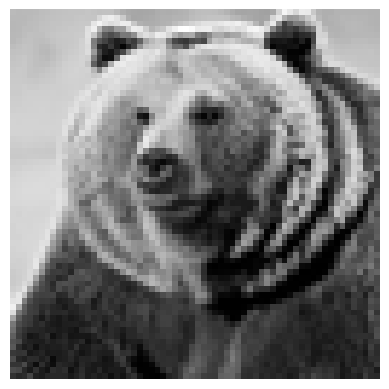

In [ ]:
img2 = Image.open("Train/Bear/1.jpeg")
img = img2.resize((64, 64))
img_grey = img.convert('L')
plt.imshow(img_grey, cmap='gray')
plt.axis('off') # to hide the axis
plt.show()

In [98]:
pdata = img_grey.getdata()
pixels = list(pdata)

print(len(pixels))
width, height = img.size
imgdata = [height,width,-1] 
imgdata.extend(pixels)


4096


In [ ]:
import os
import csv
def process_image(image_path, label):
    img2 = Image.open(image_path).convert('L') 
    img = img2.resize((64, 64))
    pixels = list(img.getdata()) 
    data = [label] 
    data.extend(pixels) 
    return data

label_bear = 0
label_panda = 1

csv_file_path = "pixel_red.csv"

with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
  
    for i in range(1, 250):
        image_path = f"Train/Bear/{i}.jpeg"
        if os.path.isfile(image_path):
            data = process_image(image_path, label_bear)
            writer.writerow(data)
    
    for i in range(1, 250):
        image_path = f"Train/Panda/{i}.jpeg"
        if os.path.isfile(image_path):
            data = process_image(image_path, label_panda)
            writer.writerow(data)

In [ ]:
data_bp = np.genfromtxt('pixel_red.csv', delimiter=',')

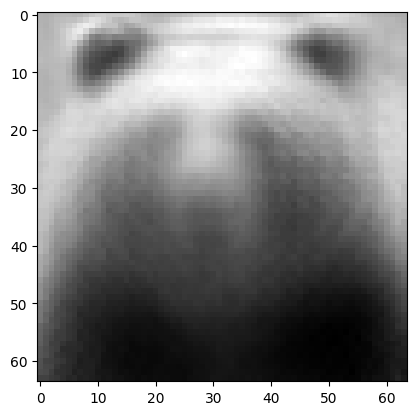

In [ ]:
labels = data_bp[:,0]
bearspandas = data_bp[:,1:]
bears = bearspandas[labels==0]
average_bear_image = np.mean(bears, axis=0)
avgbear = average_bear_image.reshape(64,64)
plt.imshow(avgbear, cmap='gray')
plt.show()

In [ ]:
U, S, V = np.linalg.svd(bearspandas)

In [ ]:
print(U.shape)
print(S.shape)
print(V.shape)

(498, 498)
(498,)
(4096, 4096)


Text(0.5, 1.0, 'PC3')

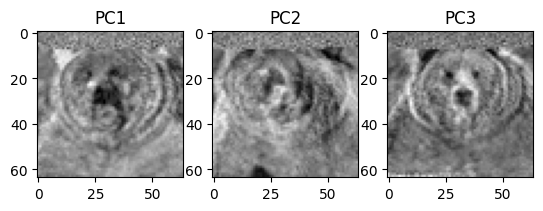

In [ ]:
pc1 = V[:,1]
pc2 = V[:,2]
pc3 = V[:,3]
pc4 = V[:,4]
fig, axes = plt.subplots(1, 3)
axes[0].imshow(pc1.reshape(64,64),cmap='gray')
axes[1].imshow(pc2.reshape(64,64),cmap='gray')
axes[2].imshow(pc3.reshape(64,64),cmap='gray')
axes[0].set_title("PC1")
axes[1].set_title("PC2")
axes[2].set_title("PC3")

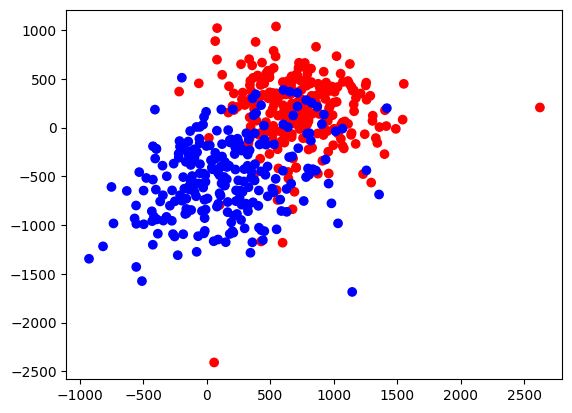

In [ ]:
scores1 = bearspandas @ pc1
scores2 = bearspandas @ pc2
scores3 = bearspandas @ pc3
scores4 = bearspandas @ pc4
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(scores4,scores2,c=colors)

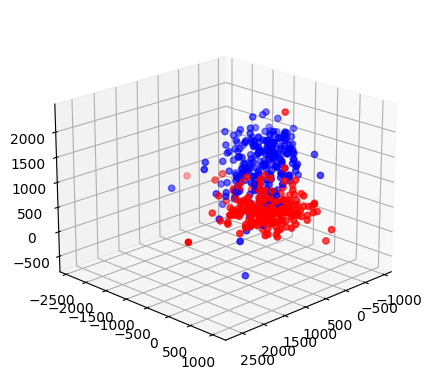

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores4, scores2, scores3, c=colors)
ax.view_init(elev=20, azim=45)
plt.show()

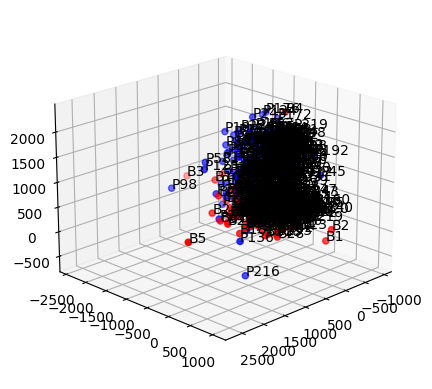

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores4, scores2, scores3, c=colors)
ax.view_init(elev=20, azim=45)
labels = ['B'+str(i+1) if i < 250 else 'P'+str(i-249) for i in range(498)]

for i in range(498):
    ax.text(scores4[i], scores2[i], scores3[i], labels[i])
plt.show()

In [ ]:
csv_file_path = "pixel_test_red.csv"

with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
  
    for i in range(251, 300):
        image_path = f"Test/Bear/{i}.jpeg"
        if os.path.isfile(image_path):
            data = process_image(image_path, label_bear)
            writer.writerow(data)
    
    for i in range(251, 300):
        image_path = f"Test/Panda/{i}.jpeg"
        if os.path.isfile(image_path):
            data = process_image(image_path, label_panda)
            writer.writerow(data)

In [ ]:
test_bp = np.genfromtxt('pixel_test_red.csv', delimiter=',')
tlabels = test_bp[:,0]
test_data = test_bp[:,1:]
test_sc2 = test_data @ pc2
test_sc3 = test_data @ pc3
test_sc4 = test_data @ pc4
pts_test_bear = np.array(list(zip(test_sc2[1:50],test_sc3[1:50],test_sc4[1:50])))
pts_test_panda = np.array(list(zip(test_sc2[51:100],test_sc3[51:100],test_sc4[51:100])))

pts_bear = np.array(list(zip(scores2[1:250], scores3[1:250], scores4[1:250])))
pts_panda = np.array(list(zip(scores2[251:500], scores3[251:500], scores4[251:500])))
center_bear = np.mean(pts_bear,axis=0)
center_panda = np.mean(pts_panda,axis=0)
print(center_bear)
print(center_panda)


[[-303.22293692  787.63322448  742.74853876]
 [-227.69634445  706.6924429   952.25468383]
 [ 345.41086708  665.29983144 1375.83880035]
 [ 524.07454753  506.30907718  221.85199532]
 [-194.37924857  611.85230153 1069.45603069]
 [ 185.1067659   878.62716332  970.14257504]
 [ 439.81655192  896.33081009  970.34346547]
 [-449.93658351  558.63394999  485.81379216]
 [  62.16560252  754.2880223  1131.15309878]
 [-103.86506705  510.58579608  669.98010458]
 [  19.25566073  976.94073064   59.17473952]
 [ 249.77655112  592.21409503 1439.78153046]
 [ 553.26870871  712.23791955  682.81575151]
 [ 445.37686011  605.98507977  688.11610308]
 [-303.23465833  457.59270179  983.81689487]
 [-294.31542993  714.62229633  820.36304589]
 [ 111.76317485  817.49691731  882.64430685]
 [ 241.5272877   634.43531586  295.87091629]
 [ 331.45753429  742.29893605  -37.49208638]
 [ 749.92607816  417.27185588  504.42947633]
 [  11.17100832  520.84629537  883.49969298]
 [ 100.04887551  425.21572841  325.73442291]
 [-195.947

In [108]:
# Compute distances from each point to the centers
dist_to_bear_center = np.linalg.norm(pts_test_bear - center_bear, axis=1)
dist_to_panda_center = np.linalg.norm(pts_test_bear - center_panda, axis=1)

# Classify each point based on which center it is closer to
labels_bear = np.where(dist_to_bear_center < dist_to_panda_center, 0, 1)

# Compute accuracy for bear points
accuracy_bear = np.sum(labels_bear == 0) / len(labels_bear)
print(f"Bear accuracy: {accuracy_bear}")

# Repeat the process for the panda points
dist_to_bear_center = np.linalg.norm(pts_test_panda - center_bear, axis=1)
dist_to_panda_center = np.linalg.norm(pts_test_panda - center_panda, axis=1)

labels_panda = np.where(dist_to_bear_center < dist_to_panda_center, 0, 1)

accuracy_panda = np.sum(labels_panda == 1) / len(labels_panda)
print(f"Panda accuracy: {accuracy_panda}")

Bear accuracy: 0.9591836734693877
Panda accuracy: 0.8085106382978723


In [121]:
indices = np.array(np.where(np.array(labels_bear) == 1))
print(indices)
indicesp = np.where(np.array(labels_panda) == 0)
indicespp = np.array([i + 50 for i in indicesp])
print(indicespp)


[[10 48]]
[[50 54 65 77 82 92 93 94 96]]
